# HW Set 9 - Random Stuff
## Due Nov 2015

### Name:   James O. Thomas

#### Note: If a problem asks you to work things out for different initial conditions or timesteps, please first do your first choice in one cell, then copy your code with the new inputs into a new cell, etc.  Try to end up with a notebook that would be a complete solution if printed out.

---


In [1]:
%matplotlib inline

**Problem 1: Rejection Method**

Use the rejection method to generate a sequence of random numbers distributed according to $P_y(y) = e^{-y}$.  Make a 10-bin histogram of the resulting distribution for $N=1000$ draws from the distribution, and a 100-bin histogram of the resulting distribution for $N=10^6$ draws from the distribution.  Plot the analytical curve over both. Here's a simple code to demonstrate how to plot a histogram:

    import matplotlib.pyplot as plt
    import numpy as np
    x = np.random.randn(500)
    width = 0.5
    histmin = np.floor(min(x))
    histmax = np.ceil(max(x))+width
    bins = np.arange(histmin,histmax,width)
    plt.hist(x,bins=bins)
    plt.show()


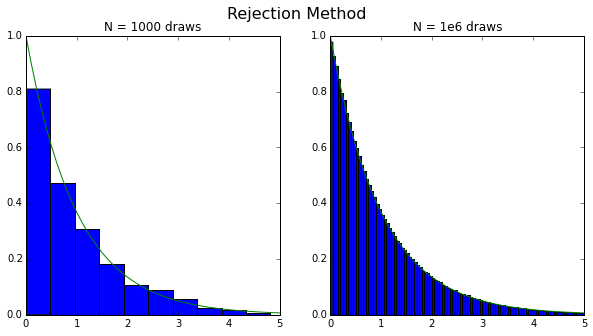

the % kept for n =  1000  is  19.41
the % kept for n =  1000000.0  is  19.88


In [2]:
# Solution to problem 1: Rejection Method
'''
James O. Thomas
November 2015
'''
import numpy as np
import matplotlib.pyplot as plt

def distfunc(x):
    y = np.exp(-x)
    return y

max_val = 5
min_val = 0

N = 1000  # number of points
x = np.empty(N)
max_y = distfunc(min_val)

# first do the 100 draws
tries = 0
count = 0
while count < N:
    x_val = np.random.random_sample()*(max_val - min_val) + min_val    
    y_val = np.random.random_sample()*max_y
    y_test = distfunc(x_val)
    tries += 1
    if y_val < y_test:
        x[count] = x_val
        count += 1

# now do 1e6 draws       
N2 = 1e6
x2 = np.empty(N2)

tries2 = 0
count2 = 0
while count2 < N2:
    x_val = np.random.random_sample()*(max_val - min_val) + min_val
    y_val = np.random.random_sample()*max_y
    y_test = distfunc(x_val)
    tries2 +=1
    if y_val < y_test:
        x2[count2] = x_val
        count2 +=1

analytic_x = np.arange(min_val, max_val+0.5, 0.1)
A = 1/(np.exp(-min_val)-np.exp(-max_val))
analytic_y = distfunc(analytic_x)

fig = plt.figure(figsize = (10,5))
fig.suptitle('Rejection Method', size = 16)

ax1 = fig.add_subplot(121)
ax1.hist(x, bins=10, normed=True)
ax1.set_xlim(min_val,max_val)
ax1.plot(analytic_x,analytic_y)
ax1.set_title('N = 1000 draws')

ax2 = fig.add_subplot(122)
ax2.hist(x2, bins = 100, normed=True)
ax2.set_xlim(min_val, max_val)
ax2.plot(analytic_x, analytic_y)
ax2.set_title('N = 1e6 draws')

plt.show()
print('the % kept for n = ',N, ' is ',round(N/tries*100,2))
print('the % kept for n = ',N2, ' is ',round(N2/tries2*100,2))

From the above histograms we can see that the rejection method does indeed generate random numbers with the desired distribution. However, this method is not always very efficient. Only about $1/5 ^{\rm{th}} $ of the generated values were kept. Since this distribution admits an inverst, the inversion method would probably be more efficient.

---
**Problem 2: Hypersphere volume**

Newman problem 10.7

This exercise asks you to estimate the volume of a sphere of unit radius in ten dimenstions using a Monte carlo method. Consider the equivalent problem in two dimensions. The area of a circle of unit radius is given by the integral

$$ I = \iint_{-1}^{+1} f(x,y)dxdy$$

where $f(x,y) = 1$ everywhere inside the circle and zero everywhere outside. If we didn't already know the area of the circle, we could calculate it by Monte Carlo integration. We would generate a set of $N$ random points $(x,y)$, where both $x$ and $y$ are in the range from -1 to 1. Then the two-dimensional version of Eq.(10.33) for this calculation would be

$$I \approx \frac{4}{N} \sum ^N _{i=1} f(x_i,y_i)$$.

Generalize this method to the ten-dimensional case and write a program to perform a Monte Carlo calculation of the volume of a sphere of unit radius in ten dimensions.

If we had to do a ten-dimensional integral the traditional way, it would take a very long time. Even with only 100 points along each axis (which wouldn't give a very accurate result) we'd still have $100^{10} = 10^{20}$ points to sample, which is impossible on any computer. But using Monte Carlo method we can get a pretty good result with a million points or so.

**Solution**

Generalizing this problem to $m$ dimensions is fairly straight forward. 

$$ I \approx \frac{2^{m}}{N} \sum ^N _{i=1} f(\vec{r_i} ) $$

where $\vec{r_i}$ is an $m$ dimensional vector. In the case of 10 dimensions we have

$$ I \approx \frac{2^{10}}{N} \sum ^N _{i=1} f(\vec{r_i} )$$

In [3]:
# Solution to problem 10.7: volume of a hyper sphere

import numpy as np
import matplotlib.pyplot as plt

dims = [2,10]     # dimensionality
N = int(1e6)      # number of points used to calculate this

for m in dims:
    count = 0
    for i in range(N):
        r = np.random.random_sample([m])
        l = np.linalg.norm(r)
        if l <= 1:
            count += 1
    I = 2**m/N*count
    sigma = np.sqrt(I*(2**m-I))/np.sqrt(N)    # eq 10.26 from book
    print('the approximate value for '+str(m)+' dimensions is '+str(round(I,5))+' +/- '+str(round(sigma,5)))


the approximate value for 2 dimensions is 3.14203 +/- 0.00164
the approximate value for 10 dimensions is 2.5088 +/- 0.05062


Running the above code we can generate an approximate value for the volume of an $m$ dimensional sphere. The uncertaintits are calculated according to equation (10.26) from the book.

$$\sigma = \sqrt{\rm{var}k} = \frac{\sqrt{I(A-I)}}{\sqrt{N}}$$

The exact values for the area of an $m$ dimensional hypersphere are also analytically known. According to [wikipedia](https://en.wikipedia.org/wiki/Volume_of_an_n-ball), the volume of a hypersphere of even number of spacial dimensions is given by:

$$V_{2k}(R) = \frac{\pi ^k}{k!}R^{2k}$$

for a 2 dimensional hypershpere (a.k.a. a circle) we have

$$V_2 = \pi R^2 $$

for a 10 dimensional hypersphere we have

$$V_{10} = \frac{\pi ^5}{120}R^{10}$$

Since we have used $R=1$ in our example, we have

$$V_2 = \pi \approx 3.14159 $$

and 

$$V_{10} = \frac{\pi ^5}{120} \approx 2.55016 $$

We can see that the values calculated using the Monte-Carlo methods match the exact values to within a few percent. 

---
**Problem 3: Random Walk in 2D**

Simulate a random walk in 2D for $N_{\rm walkers}$ each stepping $N_{\rm steps}$.   Start all walkers at the origin of your coordinate system, and plot the positions of all particles at 5 times sampled from your steps (0, $N_{\rm steps}/4$, $N_{\rm steps}/2$ $N_{\rm steps}*3/4$, $N_{\rm steps}-1$).

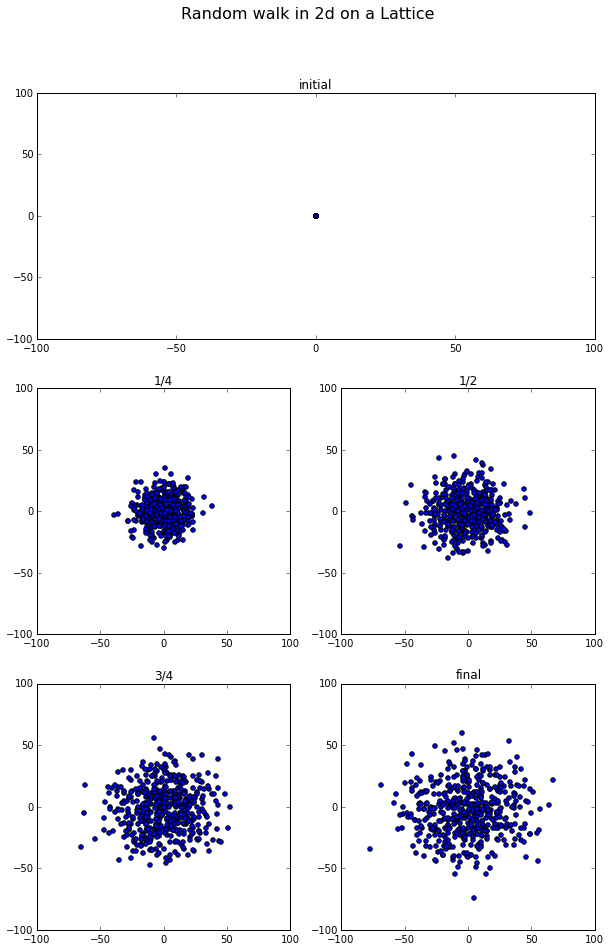

In [4]:
# Random walkers in 2D

import numpy as np
import matplotlib.pyplot as plt

calls = 0
def randomnumber():
    global calls
    calls += 1
    return np.random.random_sample()

nsteps = 1000   # time steps
nwalkers = 500  # number of walkers
pltdomain = 100
r = np.zeros([nwalkers , 2]) # [x,y]

fig = plt.figure(figsize = (10,15))
fig.suptitle('Random walk in 2d on a Lattice', size = 16)

# how do you make this the same size as the others (and still centered)?
ax = fig.add_subplot(311)
ax.scatter(r[:,0], r[:,1])
ax.set_title('initial')
ax.set_xlim(-pltdomain,pltdomain)
ax.set_ylim(-pltdomain,pltdomain)

for t in range(1,nsteps):
    # loop over time steps
    for j in range(nwalkers):
        # loop over the walkers
        rand = randomnumber()
        if rand < 0.25:
            # step left
            r[j,0] = r[j,0] - 1
        elif rand < 0.5:
            # step right
            r[j,0] = r[j,0] + 1
        elif rand < 0.75:
            # step up
            r[j,1] = r[j,1] + 1
        else:
            # step down
            r[j,1] = r[j,1] -1
    if np.abs(t-nsteps/4) < 0.1:
        ax = fig.add_subplot(3,2,3)
        ax.scatter(r[:,0],r[:,1])
        ax.set_title('1/4')
        ax.set_xlim(-pltdomain,pltdomain)
        ax.set_ylim(-pltdomain,pltdomain)
    if np.abs(t-nsteps/2) < 0.1:
        ax = fig.add_subplot(3,2,4)
        ax.scatter(r[:,0],r[:,1])
        ax.set_title('1/2')
        ax.set_xlim(-pltdomain,pltdomain)
        ax.set_ylim(-pltdomain,pltdomain)
    if np.abs(t-3*nsteps/4) < 0.1:
        ax = fig.add_subplot(3,2,5)
        ax.scatter(r[:,0],r[:,1])
        ax.set_title('3/4')
        ax.set_xlim(-pltdomain,pltdomain)
        ax.set_ylim(-pltdomain,pltdomain)
    if t == nsteps -1:
        ax = fig.add_subplot(3,2,6)
        ax.scatter(r[:,0],r[:,1])
        ax.set_title('final')
        ax.set_xlim(-pltdomain,pltdomain)
        ax.set_ylim(-pltdomain,pltdomain)
            
plt.show()
#print(calls)

We can see that all of the walkers start at the origin and then spread out as time progresses.

---
**Problem 3: Entropy**

Extend Problem 2 to now calculate the entropy of the distribution as a function of time, as we discussed in class.  Here, you should plot only the final particle distribution and the entropy curve at the end of the calculation.  You may stop your time stepping when your first particle reaches the boundary of your calculation domain.

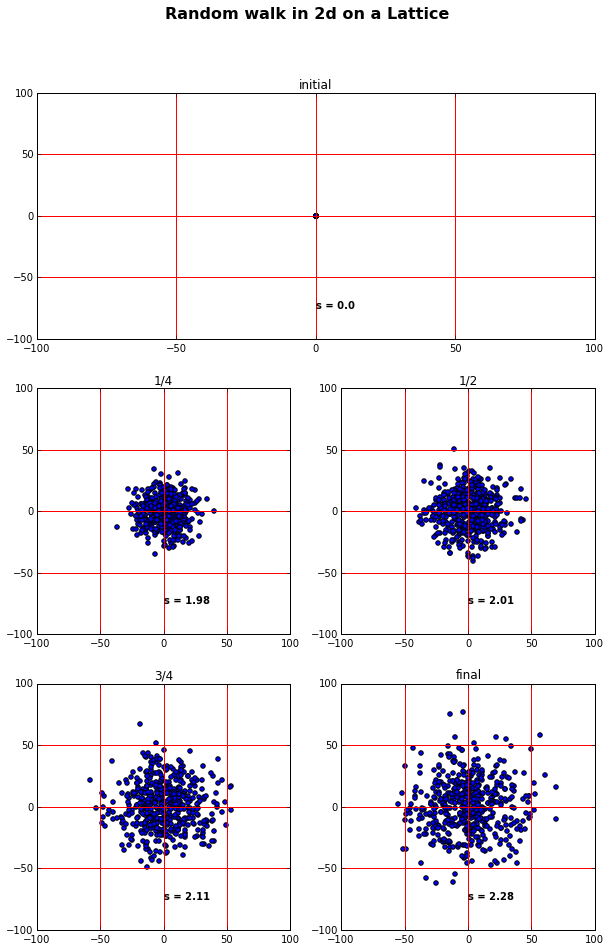

In [5]:
# Random walkers in 2D

import numpy as np
import matplotlib.pyplot as plt

calls = 0
def randomnumber():
    global calls
    calls += 1
    return np.random.random_sample()

def entropy(r, ncells = 16):
    global pltdomain
    global nwalkers
    nx = np.sqrt(ncells) 
    ny = np.sqrt(ncells)
    r = r + pltdomain    # shift it
    ix = ((r[:,0])/(2*pltdomain))*nx
    ix = ix.astype(int)
    iy = ((r[:,1])/(2*pltdomain))*ny
    iy = iy.astype(int)
    icell = ix + iy*ny
    s = 0
    for j in range(ncells):
        cellcount = len(icell[icell == j])
        p = cellcount/nwalkers
        if p > 0:
            s += -p*np.log2(p)
    return s 
    
nsteps = 1000   # time steps
nwalkers = 500  # number of walkers
pltdomain = 100
r = np.zeros([nwalkers , 2]) # [x,y]

fig = plt.figure(figsize = (10,15))
fig.suptitle('Random walk in 2d on a Lattice', size = 16, fontweight = 'bold')

ax = fig.add_subplot(311)
s = entropy(r)
ax.scatter(r[:,0], r[:,1])
ax.set_title('initial')
ax.set_xlim(-pltdomain,pltdomain)
ax.set_ylim(-pltdomain,pltdomain)
ax.plot([-pltdomain, pltdomain], [50,50], 'r')
ax.plot([-pltdomain, pltdomain], [0,0], 'r')
ax.plot([-pltdomain, pltdomain], [-50,-50], 'r')
ax.plot([50,50], [-pltdomain,pltdomain], 'r')
ax.plot([0,0], [-pltdomain,pltdomain], 'r')
ax.plot([-50,-50], [-pltdomain,pltdomain] , 'r')
ax.text(0,-75, 's = '+str(round(s,2)), fontweight = 'bold')

for t in range(1,nsteps):
    # loop over time steps
    for j in range(nwalkers):
        # loop over the walkers
        rand = randomnumber()
        if rand < 0.25:
            # step left
            r[j,0] = r[j,0] - 1
        elif rand < 0.5:
            # step right
            r[j,0] = r[j,0] + 1
        elif rand < 0.75:
            # step up
            r[j,1] = r[j,1] + 1
        else:
            # step down
            r[j,1] = r[j,1] -1
    if np.abs(t-nsteps/4) < 0.1:
        s = entropy(r)
        ax = fig.add_subplot(3,2,3)
        ax.scatter(r[:,0],r[:,1])
        ax.set_title('1/4')
        ax.set_xlim(-pltdomain,pltdomain)
        ax.set_ylim(-pltdomain,pltdomain)
        ax.plot([-pltdomain, pltdomain], [50,50], 'r')
        ax.plot([-pltdomain, pltdomain], [0,0], 'r')
        ax.plot([-pltdomain, pltdomain], [-50,-50], 'r')
        ax.plot([50,50], [-pltdomain,pltdomain], 'r')
        ax.plot([0,0], [-pltdomain,pltdomain], 'r')
        ax.plot([-50,-50], [-pltdomain,pltdomain] , 'r')
        ax.text(0,-75, 's = '+str(round(s,2)), fontweight = 'bold')
    if np.abs(t-nsteps/2) < 0.1:
        s = entropy(r)
        ax = fig.add_subplot(3,2,4)
        ax.scatter(r[:,0],r[:,1])
        ax.set_title('1/2')
        ax.set_xlim(-pltdomain,pltdomain)
        ax.set_ylim(-pltdomain,pltdomain)
        ax.plot([-pltdomain, pltdomain], [50,50], 'r')
        ax.plot([-pltdomain, pltdomain], [0,0], 'r')
        ax.plot([-pltdomain, pltdomain], [-50,-50], 'r')
        ax.plot([50,50], [-pltdomain,pltdomain], 'r')
        ax.plot([0,0], [-pltdomain,pltdomain], 'r')
        ax.plot([-50,-50], [-pltdomain,pltdomain] , 'r')
        ax.text(0,-75, 's = '+str(round(s,2)), fontweight = 'bold')
    if np.abs(t-3*nsteps/4) < 0.1:
        s = entropy(r)
        ax = fig.add_subplot(3,2,5)
        ax.scatter(r[:,0],r[:,1])
        ax.set_title('3/4')
        ax.set_xlim(-pltdomain,pltdomain)
        ax.set_ylim(-pltdomain,pltdomain)
        ax.plot([-pltdomain, pltdomain], [50,50], 'r')
        ax.plot([-pltdomain, pltdomain], [0,0], 'r')
        ax.plot([-pltdomain, pltdomain], [-50,-50], 'r')
        ax.plot([50,50], [-pltdomain,pltdomain], 'r')
        ax.plot([0,0], [-pltdomain,pltdomain], 'r')
        ax.plot([-50,-50], [-pltdomain,pltdomain] , 'r')
        ax.text(0,-75, 's = '+str(round(s,2)), fontweight = 'bold')
    if t == nsteps -1:
        s = entropy(r)
        ax = fig.add_subplot(3,2,6)
        ax.scatter(r[:,0],r[:,1])
        ax.set_title('final')
        ax.set_xlim(-pltdomain,pltdomain)
        ax.set_ylim(-pltdomain,pltdomain)
        ax.plot([-pltdomain, pltdomain], [50,50], 'r')
        ax.plot([-pltdomain, pltdomain], [0,0], 'r')
        ax.plot([-pltdomain, pltdomain], [-50,-50], 'r')
        ax.plot([50,50], [-pltdomain,pltdomain], 'r')
        ax.plot([0,0], [-pltdomain,pltdomain], 'r')
        ax.plot([-50,-50], [-pltdomain,pltdomain] , 'r')
        ax.text(0,-75, 's = '+str(round(s,2)), fontweight = 'bold')
            
plt.show()
#print(calls)

We can see from the plots above that in this simulation the entropy is always increasing (as expected). If we were to continue this simulation until equilibrium is reached. In order to simulate this we would need to impliment periodic (or some other appropriate) boundary conditions.

---
**Problem 4: Diffusion in 1D**

Write a code to solve the diffusion equation in 1D using the method of FTCS described in class and in Section 9.3 of your text.  For your arbitrary initial condition, use a Gaussian distribution (like used in the wave examples), but with a left hand boundary condition of 0.5.  Plot the distribution as a function of time, sampling every $N$ steps (where you will decide what $N$ should be for visual appeal).  Plot the results.   

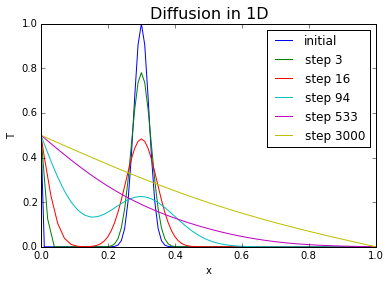

In [6]:
# Diffusion in 1D

import numpy as np
import matplotlib.pyplot as plt

def initialize(x):
    x0 = 0.3
    k = 1000  # m^-2
    y = np.exp(-k*(x-x0)**2)
    return y


# constants
L = 1.0           # length of segment
M = 100           # segments of string
N = 3000           # time steps
D = 4.25e-6       # m^2/s
a = L/N           # grid spacing
h = a**2/(2*D)    # time spacing
c = h*D/(a*a)     # constant

T = np.zeros([N+1,M+1])  #[time,space]
x1 = np.linspace(0,L,M+1)
T[0,:] = initialize(x1)  # initial time value
#plt.figure()
#plt.plot(T[0,:])
#plt.title('test')
#plt.show()
T[:,0] = 0.5             # boundary value for space

for t in range(0,N):
    # loop through time
    for x in range(1,M):
        # loop through space
        T[t+1,x] = T[t,x] + c*(T[t,x+1] + T[t,x-1] - 2*T[t,x])

plt.figure()
plt.title('Diffusion in 1D', size = 16)
plt.plot(x1, T[0,:], label = 'initial')
nplots = 5
plots = np.logspace(-3,0,nplots)
for p in plots:
    plt.plot(x1, T[p*N,:], label = 'step '+str(int(p*N)))
plt.legend()
plt.xlabel('x')
plt.ylabel('T')
plt.show()

When generating the plot above I set the left hand boundary condition to 0.5 and kept the right boundary set at 0. We can see that the temperature profile goes to a straight line between the two spacial boundaries.

---
**Problem 5: Diffusion Limited Aggregation**

Write a code that simulates diffusion limited aggregation in 2D, as discussed in class, and prints out the dimmensionality of the resulting cluster.  Plot the final state of the cluster.  As discussed in class, put a seed particle in you computational domain.  Start particles on a circle of radius $R_{\rm start}$ that is $\sim$3-5 units bigger than the cluster size.  If a particle wanders out past 1.5 $R_{\rm start}$, kill it and restart a new random particle on the circle.  

For calculating the radius of the cluster a useful NumPy routine is "nonzero()" which returns the indices of the array that store values that are not zero.  So for example

    x,y = np.nonzero(c)

returns the $x,y$ arrays of non-zero elements in array $c$.  You can then use these to calculate $r_{\rm max}$, and then add 3-5 to get $R_{\rm start}$.

dimensionality =  1.828


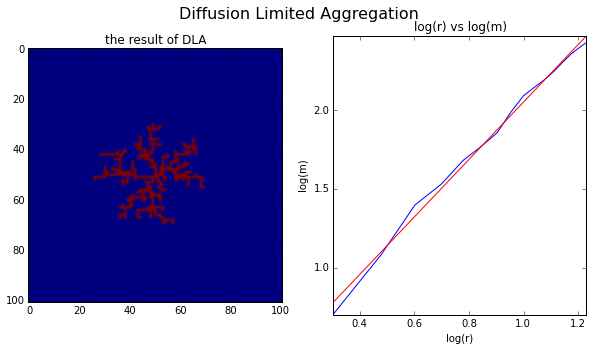

In [8]:
# Diffusion Limited Aggregation

import numpy as np
import matplotlib.pyplot as plt

def initialize(ngrid, center):
    c = np.zeros([ngrid,ngrid],dtype = 'int')
    c[center,center] = 1
    return c

def ctest(x,y,c):
    if c[x,y] == 1:
        return True
    if c[x-1,y] == 1 or c[x+1,y] == 1 or c[x,y-1] == 1 or c[x,y+1] == 1:
        return True
    
def cluster_size(c):
    x,y = np.nonzero(c)
    r = np.sqrt((x-center)**2 + (y-center)**2)
    return max(r)

def walk(x,y):
    rand_val = np.random.random_sample()
    if rand_val < 0.25:
        x += 1
    elif rand_val < 0.5:
        x -= 1
    elif rand_val < 0.75:
        y += 1
    else:
        y -= 1
    return x,y

ngrid = 101
center = int(ngrid/2)
ntry = 700
plt.lim = 100

c = initialize(ngrid,center)

for i in range(ntry):
    rstart = int(cluster_size(c) + 3)
    theta = np.random.random_sample()*2*np.pi # random angle to start the walker
    x = int(center + rstart*np.cos(theta))
    y = int(center + rstart*np.sin(theta))
    go = True
    while go == True:
        # random step
        x,y = walk(x,y)
        test = ctest(x,y,c)  # check if adjascent cell is occupied 
        if test == True:     # if so it sticks,
            c[x,y] = 1
            go = False       # start another walker
        r = np.sqrt((x-center)**2 + (y-center)**2) # check if walker went too far
        if r > 1.5*rstart:   # if walker gets too far, start another walker
            go = False

# now calculate the dimensionality
ry, rx = np.mgrid[0:ngrid,0:ngrid]

rx = rx - center
ry = ry - center

r = np.sqrt(rx**2 + ry**2) # cells corresponding to radius
rc = r*c                   # the radius of occupied cells
rad = np.arange(2,int(rstart*0.7))
m_r = []
for i in range(2,int(rstart*0.7)):
    a = rc[rc<i]
    m_r.append(len(a[a>0])) # the 'mass' as a function of radius

logr = np.log10(rad)
logm = np.log10(m_r)
m,b = np.polyfit(logr,logm,1)
xfit = np.linspace(min(logr),max(logr),100)
yfit = m*xfit + b
print('dimensionality = ', round(m,3))
plt.show()

fig = plt.figure(figsize = (10,5))
plt.suptitle('Diffusion Limited Aggregation', size = 16)

ax1 = fig.add_subplot(121)
ax1.imshow(c)
ax1.set_title('the result of DLA')

ax2 = fig.add_subplot(122)
ax2.plot(logr,logm, label = 'data')
ax2.plot(xfit,yfit, 'r-', label = 'fit')
ax2.set_title('log(r) vs log(m)')
ax2.set_xlabel('log(r)')
ax2.set_ylabel('log(m)')
ax2.set_xlim(min([min(logr),min(xfit)]),max([max(logr),max(xfit)]))
ax2.set_ylim(min([min(logm),min(yfit)]),max([max(logm),max(yfit)]))

plt.show()

---
** Problem G1: Random Walk in 3D**

Simulate a random walk in 3D allowing the walker to make steps of unit length in random directions - don't restrict the walkers to sites on a discrete lattice.  Show that the motion is diffusive, that is $<r^2> = Dt$.  Find the value of $D$.  Note that to get a uniform distribution of angles, you will actually want to draw 3 values of $x$, $y$, and $z$, and then renormalize so the length of the displacement vector is 1.0.   Think about and explain why you cannot simply draw from random distributions of $(1.0,\theta,\phi)$ and get a uniform distribution of directions.

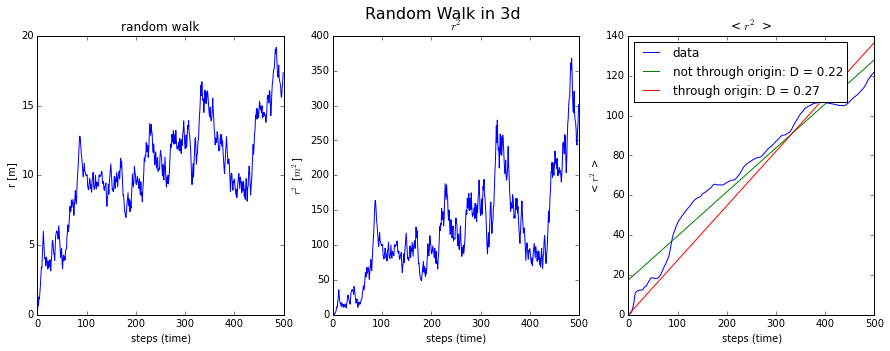

In [10]:
# Problem G1: Random Walk in 3D
import numpy as np
import matplotlib.pyplot as plt

def random_angles():
    # according to mathworld.wolfram.com
    u = np.random.random_sample()
    v = np.random.random_sample()
    theta = 2*np.pi*u
    phi = np.arccos(2*v-1)
    return theta, phi

nsteps = 500
r = np.zeros(nsteps)
steps = np.zeros(nsteps)
x = 0
y = 0
z = 0

for i in range(1,nsteps):
    theta, phi = random_angles()
    x = x + np.sin(theta)*np.cos(phi) # new x
    y = y + np.sin(theta)*np.sin(phi) # new y
    z = z + np.cos(theta)             # new z
    r[i] = np.sqrt(x**2+y**2+z**2)
    steps[i] = i
    
r2 = r**2
r2avg = np.zeros(len(r2))
for i in range(1,len(r2)):
    r2avg[i] = np.average(r2[0:i])

# fitting 
m, b = np.polyfit(steps,r2avg, 1)
r2fit = m*steps + b    

# forcing the fit to go through the origin 
stepst = steps[:,np.newaxis]                # has to be a column vector for matrix multiply
a, _, _, _ = np.linalg.lstsq(stepst, r2avg) # dont care about the other returns (for now atleast)
D = a[0]                                    # get rid of the list data type
r3fit = D*steps

fig = plt.figure(figsize = (15,5))
fig.suptitle('Random Walk in 3d', size = 16)

ax1 = fig.add_subplot(1,3,1)
ax1.plot(steps,r)
ax1.set_title('random walk')
ax1.set_xlabel('steps (time)')
ax1.set_ylabel('r [m]')

ax2 = fig.add_subplot(1,3,2)
ax2.plot(steps,r2)
ax2.set_title(r'$r^2$')
ax2.set_xlabel('steps (time)')
ax2.set_ylabel(r'$r^2$ [$m^2$]')

ax3 = fig.add_subplot(1,3,3)
ax3.plot(steps,r2avg, label = 'data')
ax3.plot(steps,r2fit, label = 'not through origin: D = '+str(round(m,2)))
ax3.plot(steps,r3fit, label = 'through origin: D = '+str(round(D,2)))
ax3.set_title(r'< $r^2$ >')
ax3.set_xlabel('steps (time)')
ax3.set_ylabel(r'< $r^2$ >')
l = ax3.legend(loc = 'upper left')

plt.show()

**G1**

We can not simply draw two random numbers for $\theta $ and $\phi $. If we did the directions of the steps would tend to 'clump' near the poles. In order to draw random $\theta $ and $\phi $ such that they will be randomely distributed over the surface of a sphere of radius 1, we draw 2 random numbers, then map them to $\theta $ and $\phi $.

$$ u = \rm{random} \in [0,1)$$
$$ v = \rm{random} \in [0,1)$$

for the mapping we have:

$$ \theta = 2 \pi u $$
$$ \phi = \cos ^{-1} (2v-1)$$

More information about similar methods can be found at [wolfram](http://mathworld.wolfram.com/SpherePointPicking.html).

As far as I know there is no way to force numpy.polyfit to go through the origin. This is easily accomplished with numpy.linalg.lstsq, or the appropriate matrix multiplication from linear algebra.

---
**Problem G2: Entropy 2**

Modify the code from Problem 3 so that particles cannot leave the computational domain.  For example, if a particle tries to step left past index $ix =0$ force it to step right instead, and similarly for the other boundaries.  Run the calculation until the entropy versus time curve flattens out.  Plot the final particle distribution and the entropy curve.

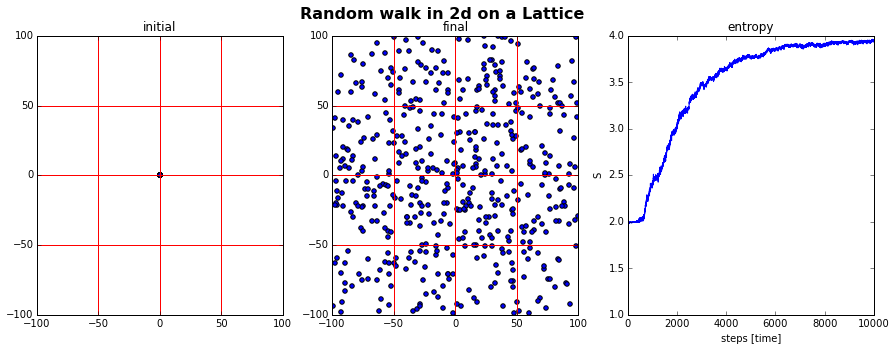

In [11]:
# Random walkers in 2D, Entropy 2

import numpy as np
import matplotlib.pyplot as plt

calls = 0
def randomnumber():
    global calls
    calls += 1
    return np.random.random_sample()

def entropy(r, ncells = 16):
    global pltdomain
    global nwalkers
    nx = np.sqrt(ncells) 
    ny = np.sqrt(ncells)
    r = r + pltdomain    # shift it
    ix = ((r[:,0])/(2*pltdomain))*nx
    ix = ix.astype(int)
    iy = ((r[:,1])/(2*pltdomain))*ny
    iy = iy.astype(int)
    icell = ix + iy*ny
    s = 0
    for j in range(ncells):
        cellcount = len(icell[icell == j])
        p = cellcount/nwalkers
        if p > 0:
            s += -p*np.log2(p)
    return s 
    
nsteps = 10000   # time steps
nwalkers = 500   # number of walkers
pltdomain = 100
r = np.zeros([nwalkers , 2]) # [x,y]
s = []

fig = plt.figure(figsize = (15,5))
fig.suptitle('Random walk in 2d on a Lattice', size = 16, fontweight = 'bold')

ax = fig.add_subplot(131)
ax.scatter(r[:,0], r[:,1])
ax.set_title('initial')
ax.set_xlim(-pltdomain,pltdomain)
ax.set_ylim(-pltdomain,pltdomain)
ax.plot([-pltdomain, pltdomain], [50,50], 'r')
ax.plot([-pltdomain, pltdomain], [0,0], 'r')
ax.plot([-pltdomain, pltdomain], [-50,-50], 'r')
ax.plot([50,50], [-pltdomain,pltdomain], 'r')
ax.plot([0,0], [-pltdomain,pltdomain], 'r')
ax.plot([-50,-50], [-pltdomain,pltdomain] , 'r')

for t in range(1,nsteps):
    # loop over time steps
    for j in range(nwalkers):
        # loop over the walkers
        rand = randomnumber()
        if rand < 0.25:
            # step left
            if r[j,0] > -pltdomain:
                r[j,0] = r[j,0] - 1
            else:
                r[j,0] = r[j,0] + 1
        elif rand < 0.5:
            # step right
            if r[j,0] < pltdomain:
                r[j,0] = r[j,0] + 1
            else:
                r[j,0] = r[j,0] - 1
        elif rand < 0.75:
            # step up
            if r[j,1] < pltdomain:
                r[j,1] = r[j,1] + 1
            else:
                r[j,1] = r[j,1] - 1
        else:
            # step down
            if r[j,1] > -pltdomain:
                r[j,1] = r[j,1] - 1
            else:
                r[j,1] = r[j,1] + 1
    s.append(entropy(r))
    
ax2 = fig.add_subplot(1,3,2)
ax2.scatter(r[:,0], r[:,1])
ax2.set_title('final')
ax2.set_xlim(-pltdomain,pltdomain)
ax2.set_ylim(-pltdomain,pltdomain)
ax2.plot([-pltdomain, pltdomain], [50,50], 'r')
ax2.plot([-pltdomain, pltdomain], [0,0], 'r')
ax2.plot([-pltdomain, pltdomain], [-50,-50], 'r')
ax2.plot([50,50], [-pltdomain,pltdomain], 'r')
ax2.plot([0,0], [-pltdomain,pltdomain], 'r')
ax2.plot([-50,-50], [-pltdomain,pltdomain] , 'r')

ax3 = fig.add_subplot(1,3,3)
ax3.plot(s)
ax3.set_title('entropy')
ax3.set_ylabel('S')
ax3.set_xlabel('steps [time]')

plt.show()

**G2**

In order to implement the new boundary conditions we simply needed to perform a check at each step and make sure that the new step would not exceed the computational domain. I did this with a set of if else statements. There may be a more computationally efficient means of implementing these boundary conditions, but this got the job done.

---
**Problem G3: DLA 2**
Write a code that generates a DLA structure using an initial "seed" which is the entire $x$ axis, e.g.,

    c = np.zeros([n,n],dtype=int)
    c[:,0] = 1
    
Then you'll start your walkers on a line that is $\sim$ 3-5 units higher than the maximum occupied $y$ value.  The resulting structure has been used to model the paths followed by electric discharges in a gas (e.g., lightning bolts).

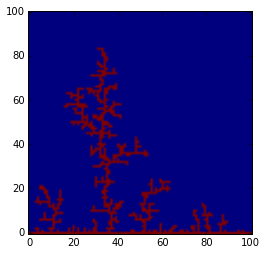

In [12]:
# Diffusion Limited Aggregation

import numpy as np
import matplotlib.pyplot as plt

def initialize(ngrid):
    # initialize 
    c = np.zeros([ngrid,ngrid],dtype = 'int')
    c[:,0] = 1
    return c

def ctest(x,y,c):
    # test if the neighbors are occupied
    if c[x,y] == 1:
        return True
    if c[x-1,y] == 1 or c[x+1,y] == 1 or c[x,y-1] == 1 or c[x,y+1] == 1:
        return True
    
def cluster_size(c):
    # get the size of the cluster
    x,y = np.nonzero(c)
    return max(y)

def boundary(x):
    # periodic boundary conditions on x
    if x < 1:
        x = x + ngrid
    if x > ngrid - 2:
        x = x - ngrid + 1
    return x

def reflect(y):
    # reflect y at the top boundary
    if y > ngrid - 2:
        y = y - 2
    return y

def walk(x,y):
    rand_val = np.random.random_sample()
    if rand_val < 0.25:
        x += 1
    elif rand_val < 0.5:
        x -= 1
    elif rand_val < 0.75:
        y += 1
    else:
        y -= 1
    x = boundary(x)
    y = reflect(y)
    return x,y

ngrid = 101
ntry = 700
plt.lim = 100

c = initialize(ngrid)

for i in range(ntry):
    x = np.random.randint(int(0.1*ngrid), int(0.9*ngrid))
    y = int(cluster_size(c)+3)
    go = True
    while go == True:
        # random step
        x,y = walk(x,y)
        test = ctest(x,y,c)  # check if adjacent cell is occupied 
        if test == True:     # if so it sticks,
            c[x,y] = 1
            go = False       # start another walker

c = np.transpose(c)    # the x and y were flipped from what I thought they were.
plt.figure()
plt.imshow(c, origin = 'lower')
plt.show()
